1. Plot both continuous and discrete signals of the function

x(t) = 325 * sin(2pi * 50t)

And also the discrete signals

x[n] = 325 * sin(2pi * 50n * delta t)

Where n is sampled from 0 to 50. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

continuous signal of function 1:

/var/folders/kh/19f7mcgj28q1vf4qgw1xcr0c0000gn/T/ipykernel_33511/837392528.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


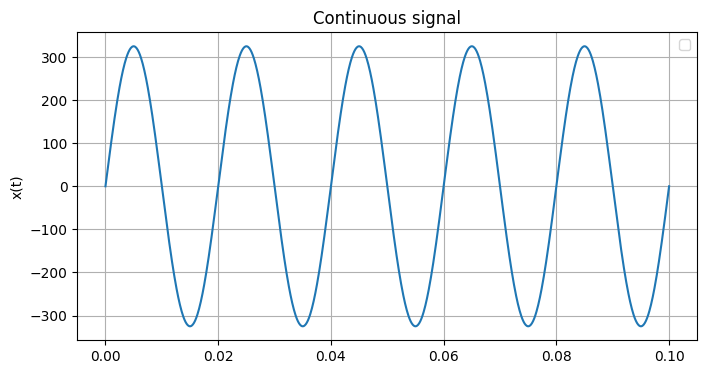

In [2]:
t = np.linspace(0, 0.1, 1000)   # i used 1000 points 

# 2. Generate the signal
t_continuous = 325 * np.sin(2 * np.pi * 50 * t)

# 3. Plot the function
plt.figure(figsize=(8, 4))
plt.plot(t, t_continuous)
plt.title('Continuous signal')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


discrete signal of function 1:

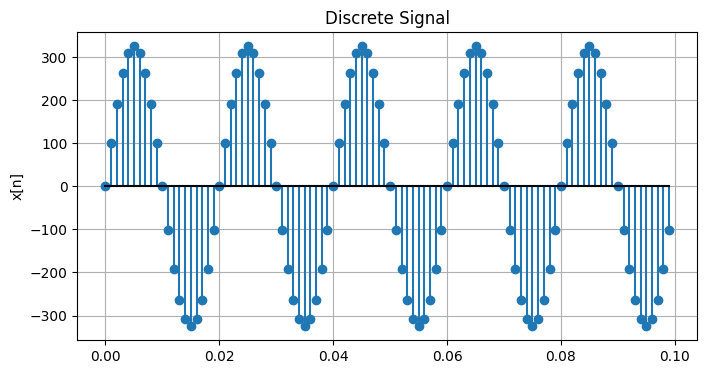

In [3]:
Ts = 1 / 1000 #period I'm sampling, since I'm doing from 0 to .1

# discrete-time indices
n = np.arange(0, 0.1, Ts)#so we're sampling from 0 to 0.1 seconds

# discrete signal x[n]
x_discrete = 325 * np.sin(2 * np.pi * 50 * n)

# Plot
plt.figure(figsize=(8, 4))
plt.stem(n, x_discrete, basefmt='k') #had to look up how to make it look nice
plt.title('Discrete Signal')
plt.ylabel('x[n]')
plt.grid(True)
plt.show()

discrete signal of x[n] = 325 * sin(2pi * 50n * delta t) sampled from n= 0 to 50

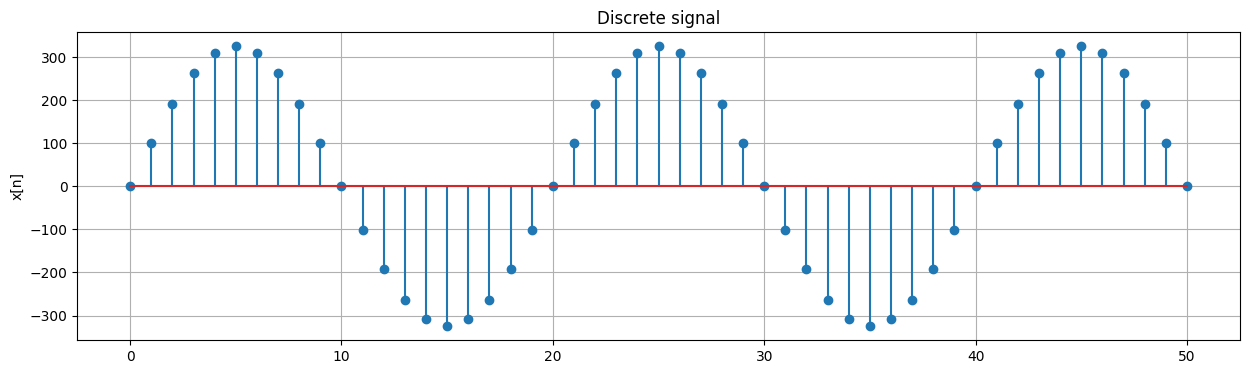

In [4]:
dt = 0.001 #sample spacing
n = np.arange(0, 51)

# Discrete signal
x_n = 325 * np.sin(2 * np.pi * 50 * n * dt)

# Plot
plt.figure(figsize=(15, 4))
plt.stem(n, x_n)
plt.title(f"Discrete signal")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()


2. Plot the real and imaginary part of the complex-valued signal when t has a range of (-0.02, 0.05)

In [5]:
#Not actually using any of this, just putting it here so I can reference to it when writing code below

function = np.exp(1j * 100 * np.pi * t) #function
real = np.exp(2j*np.pi*50*t).real #returns real parts
imag = np.exp(2j*np.pi*50*t).imag #returns imaginary parts
t_range = np.linspace(-0.02, 0.05)

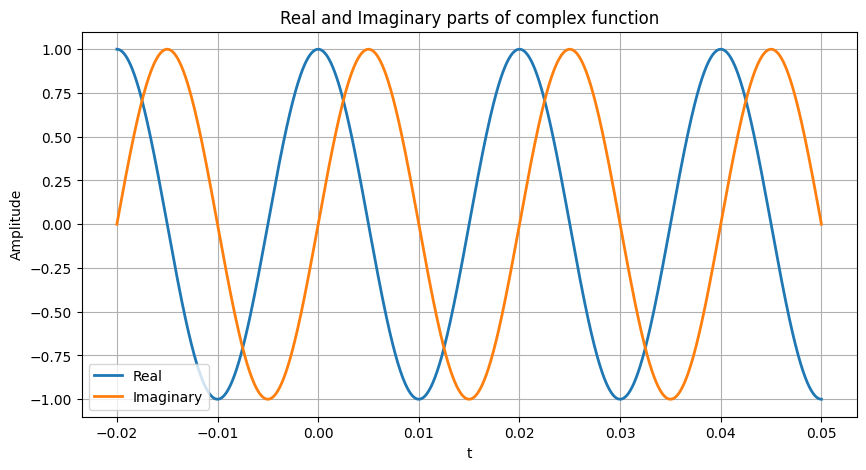

In [6]:
t = np.linspace(-0.02, 0.05, 2000)# using2000 samples

f = np.exp(1j * 100 * np.pi * t)

#Real and imaginary parts
real = f.real
imag = f.imag

#plot it all
plt.figure(figsize=(10, 5))

plt.plot(t, real, label="Real", linewidth=2)
plt.plot(t, imag, label="Imaginary", linewidth=2)

plt.title("Real and Imaginary parts of complex function")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.show()


this makes sense because when you plot the complex exp(j100πt) against time, it's cos(100πt)+jsin(100πt) (cos is real part, sin is imaginary)

3. Generate Signal Processing Plots

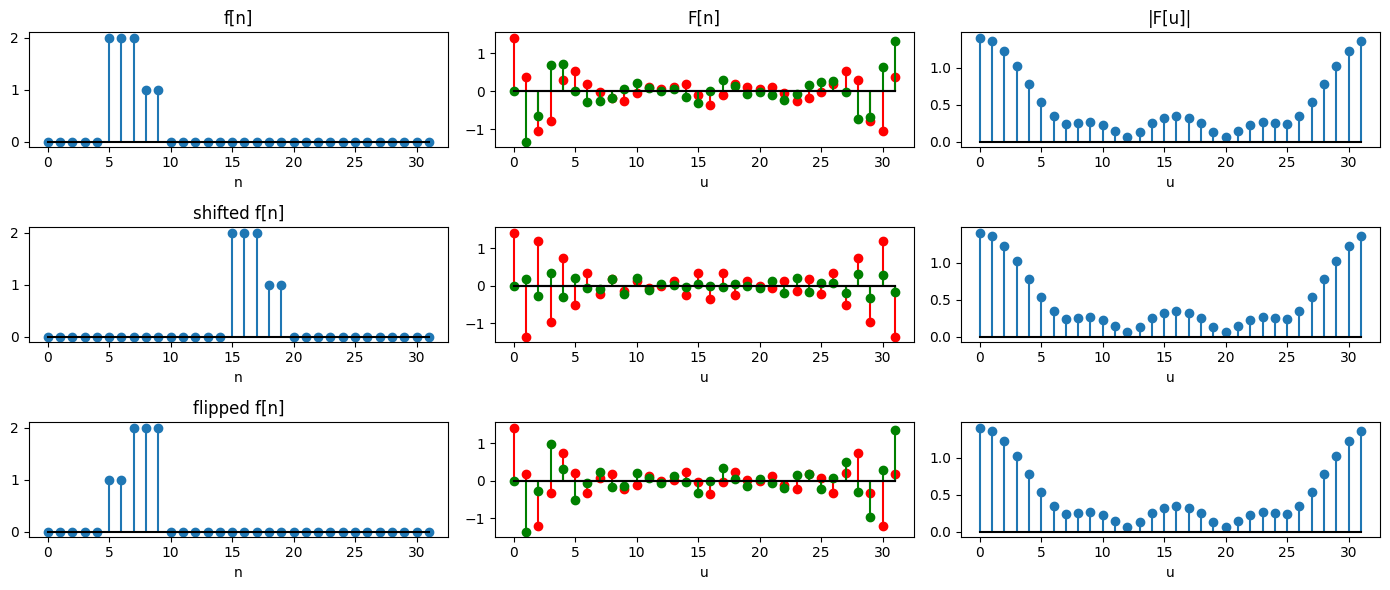

In [7]:
n=32
y = np.arange(n)

#our simple signal, all zeros
f=np.zeros(n)
#code in the signals we see in the graphs
f[5:10] = [2, 2, 2, 1, 1]

#shift signal for graph 2
f2 = np.roll(f, 10)

# flip signal for graoh 3
f3 = np.copy(f)
f3[5:10] = np.flip([2, 2, 2, 1, 1])

#fourier transform all 3 (and normalize)
scale = 1/np.sqrt(n)
F1 = np.fft.fft(f) * scale
F2 = np.fft.fft(f2) * scale
F3 = np.fft.fft(f3) * scale

#real, imaginary, magnitude for all 3

#original
real1 = np.real(F1)
imag1 = np.imag(F1)
mag1 = np.abs(F1)

#shifted
real2 = np.real(F2)
imag2 = np.imag(F2)
mag2 = np.abs(F2)

#flipped
real3 = np.real(F3)
imag3 = np.imag(F3)
mag3 = np.abs(F3)

#plot them all

plt.figure(figsize=(14, 6))

plt.subplot(3, 3, 1)
plt.stem(y, f, basefmt="k")
plt.title("f[n]")
plt.xlabel("n")

plt.subplot(3, 3, 4)
plt.stem(y, f2, basefmt="k")
plt.title(f"shifted f[n]")
plt.xlabel("n")

plt.subplot(3, 3, 7)
plt.stem(y, f3, basefmt="k")
plt.title(f"flipped f[n]")
plt.xlabel("n")

#real andimaginary
plt.subplot(3, 3, 2)
plt.stem(y, real1, linefmt='r-', markerfmt='ro', basefmt="k")
plt.stem(y, imag1, linefmt='g-', markerfmt='go', basefmt="k")
plt.title("F[n]")
plt.xlabel("u")

plt.subplot(3, 3, 5)
plt.stem(y, real2, linefmt='r-', markerfmt='ro', basefmt="k")
plt.stem(y, imag2, linefmt='g-', markerfmt='go', basefmt="k")
plt.xlabel("u")

plt.subplot(3, 3, 8)
plt.stem(y, real3, linefmt='r-', markerfmt='ro', basefmt="k")
plt.stem(y, imag3, linefmt='g-', markerfmt='go', basefmt="k")
plt.xlabel("u")

# magnitude
plt.subplot(3, 3, 3)
plt.stem(y, mag1, basefmt="k")
plt.title("|F[u]|")
plt.xlabel("u")

plt.subplot(3, 3, 6)
plt.stem(y, mag2, basefmt="k")
plt.xlabel("u")

plt.subplot(3, 3, 9)
plt.stem(y, mag3, basefmt="k")
plt.xlabel("u")

plt.tight_layout()
plt.show()



Plot the Fourier transform of the following function for frequency below 50hz, using the numpy.fft

1 / (1 + .99cos(2*pi*t))

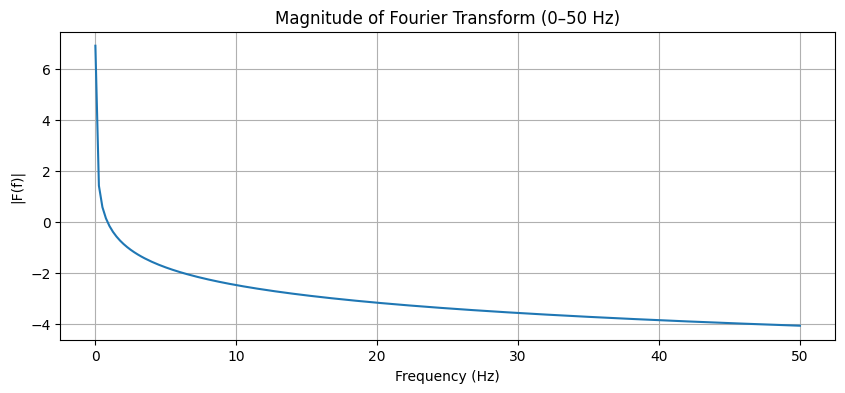

In [8]:
f = 1 / (1 + .99* np.cos(2*np.pi*t))
F = np.fft.fft(f)
N = len(F)


fs = 500 # sampling frequency in Hz
T  = 5 # duration

t  = np.arange(0, T, 1/fs)

# frequency axis
freqs = np.fft.fftfreq(N, 1/fs)

# keep only positive frequencies
mask = freqs >= 0
freqs = freqs[mask]
F = F[mask]

limit = freqs <= 50 #keep only frequencies below 50hz

plt.figure(figsize=(10,4))
plt.plot(freqs[limit], np.log(np.abs(F))[limit])
plt.title("Magnitude of Fourier Transform (0–50 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|F(f)|")
plt.grid(True)
plt.show()




<Figure size 640x480 with 0 Axes>

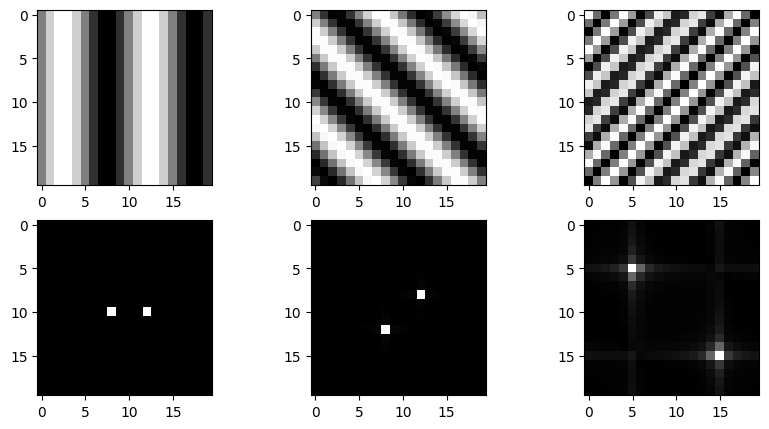

In [9]:
x = np.arange(-10, 10, 1)

X, Y = np.meshgrid(x, x)

wavelength_1 = 10
angle_1 = 0
grating_1 = np.sin(
    2*np.pi*(X*np.cos(angle_1) + Y*np.sin(angle_1)) / wavelength_1
)

wavelength_2 = 7
angle_2 = 3*np.pi/4
grating_2 = np.sin(
    2*np.pi*(X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2
)

wavelength_3 = 3
angle_3 = np.pi/4
grating_3 = np.sin(
    2*np.pi*(X*np.cos(angle_3) + Y*np.sin(angle_3)) / wavelength_3
)

# Calculate fourier transform of grating
ft1 = np.fft.ifftshift(grating_1)
ft1 = np.fft.fft2(ft1)
ft1 = np.fft.fftshift(ft1)

ft2 = np.fft.ifftshift(grating_2)
ft2 = np.fft.fft2(ft2)
ft2 = np.fft.fftshift(ft2)

ft3 = np.fft.ifftshift(grating_3)
ft3 = np.fft.fft2(ft3)
ft3 = np.fft.fftshift(ft3)


plt.set_cmap("gray")
plt.figure(figsize=(10, 5))

plt.subplot(2,3,1)
plt.imshow(grating_1)

plt.subplot(2,3,2)
plt.imshow(grating_2)

plt.subplot(2,3,3)
plt.imshow(grating_3)

plt.subplot(2,3,4)
plt.imshow(np.abs(ft1))

plt.subplot(2,3,5)
plt.imshow(np.abs(ft2))

plt.subplot(2,3,6)
plt.imshow(np.abs(ft3))
plt.show()

6. Pyramid blending

In [10]:
def count_halves_while(n):
    count = 0
    while n > 1:
        n //= 2
        count += 1
    return count #returns the number of times we can split the image in half

In [11]:
import cv2
import numpy as np

apple = cv2.imread('../data/apple.jpg')
apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
orange = cv2.imread('../data/orange.jpg')
orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)
my_mask = cv2.imread('../data/mask.jpg')
# num_halves = count_halves_while(apple)

In [12]:
def create_gaussian_pyr(img, halves):
    G = img.copy()
    gp_img = [G]
    for i in range(halves): # number of levels for 512x512 image
        G = cv2.pyrDown(G) # blur and downsample
        gp_img.append(G)
    return gp_img

In [13]:
def create_laplacian(gaussian, halves):
    lp_img = []
    num_levels = len(gaussian)
    for i in range(halves - 1):
        GE = cv2.pyrUp(gaussian[i+1])# Upsample next level
        GE = cv2.resize(GE, (gaussian[i].shape[1], gaussian[i].shape[0]))# make sure exact same size bc pyrUp sometimes messes up a little

        # Laplacian = current Gaussian - upsampled next
        L = cv2.subtract(gaussian[i], GE)
        lp_img.append(L)

    lp_img.append(gaussian[-1])
    return lp_img


In [14]:
def blend_images(gp_mask, gp_not_mask, lp_img_left, lp_img_right, levels):
    # Multiply each Laplacian image by its corresponding mask and sum the images 
    gp_mask = [m.astype(np.float32) for m in gp_mask]
    gp_not_mask = [m.astype(np.float32) for m in gp_not_mask]


    masked_lp_left = []
    for i in range(levels):
        masked_lp_left.append(lp_img_left[i] * gp_not_mask[i])

    masked_lp_right = []
    for i in range(levels):
        masked_lp_right.append(lp_img_right[i] * gp_mask[i])

    blended_pyr = []
    for i in range(levels):
        blended_pyr.append(masked_lp_left[i] + masked_lp_right[i])
    
    blended = blended_pyr[-1]   # start from smallest

    for i in range(levels-2, -1, -1):
        blended = cv2.pyrUp(blended)
        blended = cv2.resize(blended, (blended_pyr[i].shape[1], blended_pyr[i].shape[0]))
        blended = cv2.add(blended, blended_pyr[i])
    
    return blended


In [15]:
def normalize(img):
    img = img - img.min()
    img = img / img.max()
    return img

In [16]:
def resize(img):
    new_dimensions = (512, 512)
    resized_img = cv2.resize(img, new_dimensions, interpolation=cv2.INTER_AREA)
    cv2.imwrite('my_image_cv2_resized.jpg', resized_img)
    return resized_img

In [17]:
def print_blend_images(img1, img2, mask):
    img1 = resize(img1)
    img2 = resize(img2)
    mask = resize(mask)

    img1 = img1.astype(np.float32) / 255.0
    img2 = img2.astype(np.float32) / 255.0

    num_halves = count_halves_while(img1.shape[0]) #assuming img1 and 2 are same shape

    gaus_img1 = create_gaussian_pyr(img1, num_halves)
    gaus_img2 = create_gaussian_pyr(img2, num_halves)
    lap_img1 = create_laplacian(gaus_img1, num_halves)
    lap_img2 = create_laplacian(gaus_img2, num_halves)

    gaus_mask = create_gaussian_pyr(mask, num_halves)
    not_mask = cv2.bitwise_not(mask)
    not_gaus_mask = create_gaussian_pyr(not_mask, num_halves)

    blended = blend_images(gaus_mask, not_gaus_mask, lap_img1, lap_img2, num_halves)

    plt.imshow(normalize(blended))
    plt.axis("off")

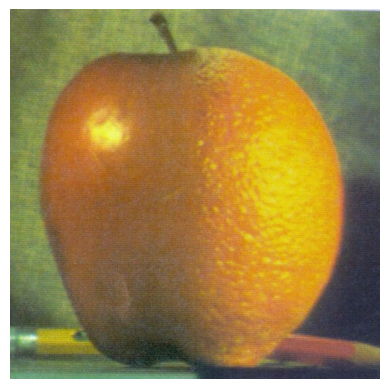

In [18]:
print_blend_images(apple, orange, my_mask)

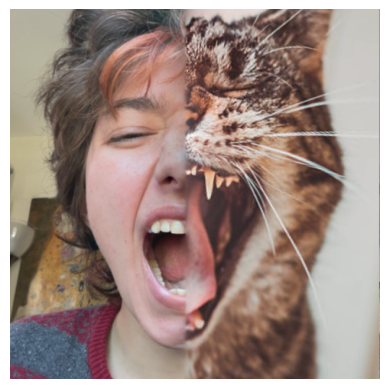

In [19]:
me = cv2.imread('../data/me.JPG')
me = cv2.cvtColor(me, cv2.COLOR_BGR2RGB)
cat = cv2.imread('../data/cat.JPG')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
mask1 = cv2.imread('../data/mask1.JPG')

print_blend_images(me, cat, mask1)

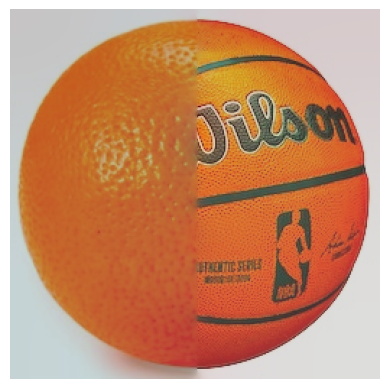

In [20]:
orange = cv2.imread('../data/orange2.JPG')
orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)
basketball = cv2.imread('../data/basketball.JPG')
basketball = cv2.cvtColor(basketball, cv2.COLOR_BGR2RGB)
mask = cv2.imread('../data/mask.jpg')

print_blend_images(orange, basketball, mask)

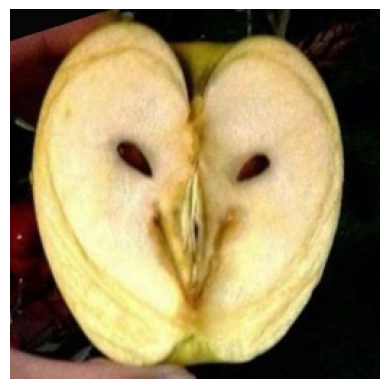

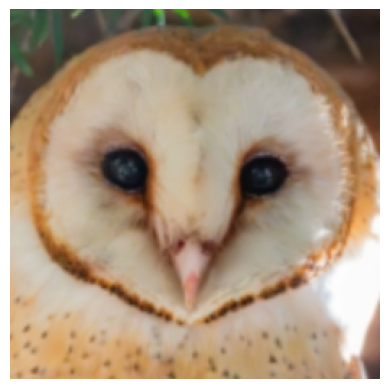

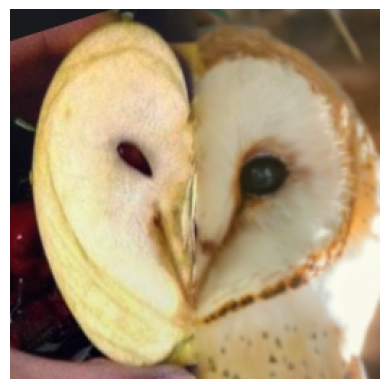

In [21]:
apple = cv2.imread('../data/apple2.JPG')
apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
owl = cv2.imread('../data/owl.JPG')
owl = cv2.cvtColor(owl, cv2.COLOR_BGR2RGB)
mask = cv2.imread('../data/mask.jpg')

plt.imshow(apple)
plt.axis("off")
plt.show()
plt.imshow(owl)
plt.axis("off")
plt.show()

print_blend_images(apple, owl, mask)

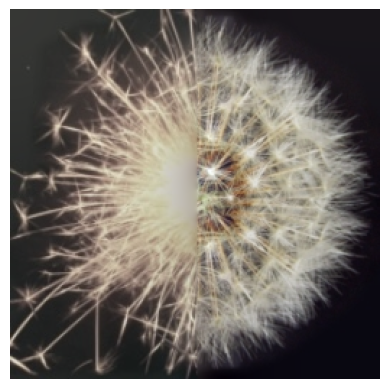

In [22]:
fire = cv2.imread('../data/fire.JPG')
fire = cv2.cvtColor(fire, cv2.COLOR_BGR2RGB)
flower = cv2.imread('../data/flower.JPG')
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)
mask = cv2.imread('../data/mask.jpg')

print_blend_images(fire, flower, mask)

Create an image that shows multiple levels of the Gaussian and Laplacian pyramid of an image and include this in your write up along with an explanation of image pyramids in your own words.


In [23]:
def display(images):
    for i in images:
        dpi = 10
        scalar = 2
        fig = plt.figure(figsize=(scalar*i.shape[0]/dpi, scalar * i.shape[1]/dpi), dpi=dpi)
        plt.imshow(i)
        plt.axis("off")
        plt.show()

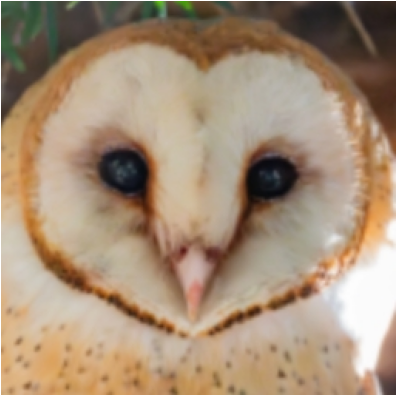

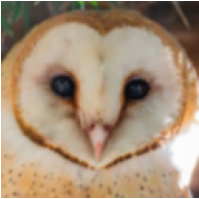

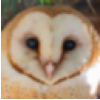

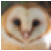

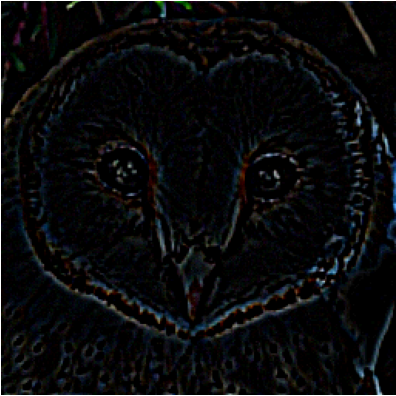

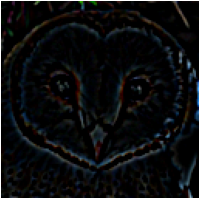

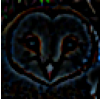

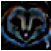

In [24]:
gaus = create_gaussian_pyr(owl, 9)
laplace = create_laplacian(gaus, 9)

g_images = [gaus[0], gaus[1], gaus[2], gaus[3]]
l_images = [laplace[0], laplace[1], laplace[2], laplace[3]]
for i in range(len(l_images)):
    l_images[i] = normalize(l_images[i])

display(g_images)
display(l_images)


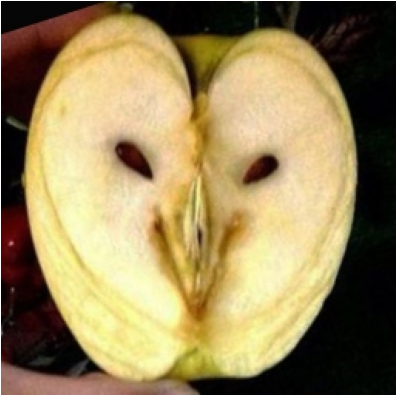

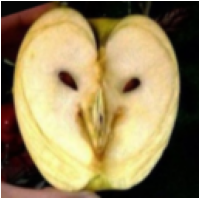

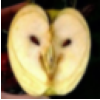

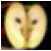

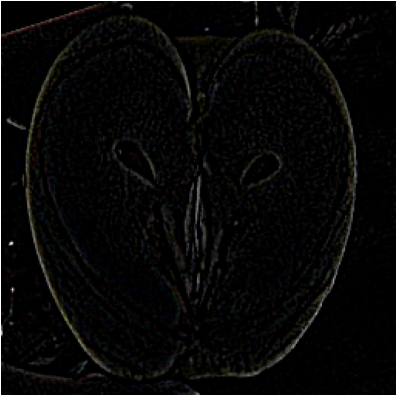

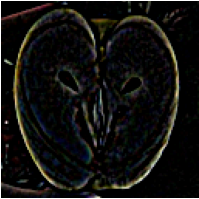

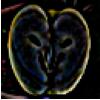

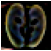

In [25]:
gaus = create_gaussian_pyr(apple, 9)
laplace = create_laplacian(gaus, 9)

g_images = [gaus[0], gaus[1], gaus[2], gaus[3]]
l_images = [laplace[0], laplace[1], laplace[2], laplace[3]]
for i in range(len(l_images)):
    l_images[i] = normalize(l_images[i])

display(g_images)
display(l_images)